# Classification tools / cheatsheet

@Author Javier Cebrián Casado
@ Date 05/04/2021 (must be continued)

This notebook has the basic code reference to:
- Train
- Tune hyperparameters: GridSearchCV or RandomSearchCV
- Dummy Classifier
- Evaluate: accuracy, precision, recall, f1, report, ROC AUC and Precision-Recall Curves  
- Visualize regions and data
- At the end the same with pipelines

(Cross-validation will be included in another cheatsheet)



In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt


# Simple classifier example

## Generate synthetic data 

In [2]:
X,y = make_classification(n_samples=750,n_features=2,n_redundant=0,n_repeated=0,
                         n_classes=2,n_clusters_per_class=1,flip_y=0.01,class_sep=1,
                         random_state=42)
#In this case, i.e. only 2 features and 2 classes

## Plot points by class

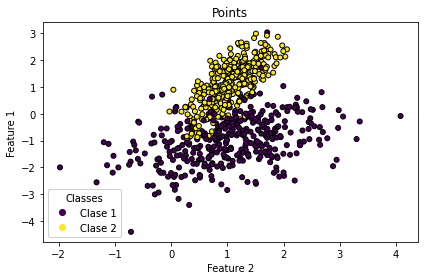

In [3]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], marker='o', c=y,
            s=25, edgecolor='k')
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 1')
ax.set_title('Points')

# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="Classes")

#Modify with name of classes (if not, the name is the number of the class)
legengElements = (scatter.legend_elements()[0],['Clase 1','Clase 2'])
legend1 = ax.legend(*legengElements,
                    loc="lower left", title="Classes")

ax.add_artist(legend1)
fig.tight_layout()

plt.show()


## Data split to train

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #rs optional

## Train

In [5]:
#In this case KNN (i.e.)
clf=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
# clf=LogisticRegression().fit(X_train,y_train)

## Plot regions

In [ ]:
# Plot the decision boundary by assigning a color in the color map
# to each mesh point.
    
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='Pastel1',alpha=0.2,shading='auto')
# Plot training points
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=None, edgecolor = 'black',alpha=0.7)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

legengElements = (scatter.legend_elements()[0],['Clase 1','Clase 2'])
plt.legend(*legengElements, loc="lower left", title="Classes")

plt.xlabel('Feature 2')
plt.ylabel('Feature 1')
plt.title('Linear classification')
plt.show()
# plot(X_train, y_train, 5, 'uniform')

## Evaluation

### Check if dataset is balanced (This code is from ML applied to python course in Coursera)

In [ ]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])
np.bincount(y_binary_imbalanced)

### Comparison with dummy 
Whit dummy classifier we can establish a baseline in order to compare the result with true classifer.

- 'stratified' generates random predictions by respecting the training set class distribution.
- 'most_frequent' always predicts the most frequent label in the training set.
- 'prior' always predicts the class that maximizes the class prior (like most_frequent) and predict_proba returns the class prior.
- Uniform generates predictions uniformly at random.

In [ ]:
from sklearn.dummy import DummyClassifier

# Dummy 'most frequent' always predict the most frequent class
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

print('Most frequent:')
print(y_dummy_predictions)
print('Dummy score (most frequent): ', dummy_majority.score(X_test, y_test))
#Dummy is the minimum result that we can expect in our classifier, if our classifier has a similar result it isn't as good as expected.

dummy_stratified = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)

print('Stratified:')
print(y_dummy_predictions)
print('Dummy score (Stratified): ', dummy_stratified.score(X_test, y_test))

dummy_prior = DummyClassifier(strategy = 'prior').fit(X_train, y_train)
y_dummy_predictions = dummy_prior.predict(X_test)

print('Prior:')
print(y_dummy_predictions)
print('Dummy score (prior): ', dummy_prior.score(X_test, y_test))

dummy_uniform = DummyClassifier(strategy = 'uniform').fit(X_train, y_train)
y_dummy_predictions = dummy_uniform.predict(X_test)

print('Uniform:')
print(y_dummy_predictions)
print('Dummy score (uniform): ', dummy_uniform.score(X_test, y_test))

print('True classifier score: ', clf.score(X_test, y_test))


### Confussion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix

clf_prediction = clf.predict(X_test)
confusion = confusion_matrix(y_test, clf_prediction)
print(confusion)

### Metrics

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

Precision = $\frac{TP}{TP + FP}$

Recall = $\frac{TP}{TP + FN}$  Also known as sensitivity, or True Positive Rate

F1 = $\frac{2 * Precision * Recall}{Precision + Recall} $

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, clf_prediction)))
print('Precision: {:.2f}'.format(precision_score(y_test, clf_prediction)))
print('Recall: {:.2f}'.format(recall_score(y_test, clf_prediction)))
print('F1: {:.2f}'.format(f1_score(y_test, clf_prediction)))

Or also with report:
- Support is the number of actual occurrences of the class in the specified dataset. 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf_prediction, target_names=['0', '1']))

### Precision recall curve

To predict probabilities:

- predict_proba to obtain the probability of 0 clf.predict_proba(X_test)[:,0] o 1 clf.predict_proba(X_test)[:,1]. 
- For classifiers with hyperplane i.e  SVC (SVM etc) also can be used decision_function(X_test) because it is the distance with de hyperplane.

Choose the better thresold depends of the trade off between recall and precision. In some problems we could prefer more precision or vice versa. 
Anyway in imbalance datasets a good point of equilibrium it is choosing F score because it is unbiased for imbalanced classification.


In [ ]:
from sklearn.metrics import precision_recall_curve

clf_prediction = clf.predict(X_test)
# clf_prediction_prob = clf.decision_function(X_test)
clf_prediction_prob = clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, clf_prediction_prob)

# Choose the better thresold depends of the trade off between recall and precision. 
# In some problems we can prefer more precision or vice versa. 
# Anyway in imbalance datasets a good point of equilibrium it is choosing F score because it is unbiased 
# for imbalanced classification.
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
# closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[ix]
closest_zero_r = recall[ix]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
# plt.axes().set_aspect('equal')
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision recall curve',fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
print('Threshold based on F-score is: ',thresholds[ix])


### ROC AUC
The best threshold is upper left.

In [ ]:
from sklearn.metrics import roc_curve, auc

clf_prediction = clf.predict(X_test)

clf_prediction_prob = clf.predict_proba(X_test)
clf_prediction_prob

fpr, tpr, _ = roc_curve(y_test, clf_prediction_prob[:,1])
roc_auc = auc(fpr, tpr)

# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.plot(fpr[ix], tpr[ix], 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.axes().set_aspect('equal')
plt.show()

print('Best threshold : ',thresholds[ix])


# Example with radial points and GridShearchCV

## Generate synthetic data 

In [ ]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000,noise=0.2, factor=0.015, random_state=1)

#In this case with cicles

## Plot points by class

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], marker='o', c=y,
            s=25, edgecolor='k')
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 1')
ax.set_title('Points')

# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="Classes")

#Modify with name of classes (if not, the name is the number of the class)
legengElements = (scatter.legend_elements()[0],['Clase 1','Clase 2'])
legend1 = ax.legend(*legengElements,
                    loc="lower left", title="Classes")

ax.add_artist(legend1)
fig.tight_layout()

plt.show()


## Data split to train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #rs optional

## Train with tuning

We can use:
- Search space 
- Random search
- Grid search

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)
sorted(clf.cv_results_.keys())
(clf.cv_results_)
print('Best Score: %s' % clf.best_score_)
print('Best Hyperparameters: %s' % clf.best_params_) 
print('With a radial function the best kernel is radial rbf')

## Plot regions

In [ ]:
# Plot the decision boundary by assigning a color in the color map
# to each mesh point.
    
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='Pastel1',alpha=0.2,shading='auto')
# Plot training points
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=None, edgecolor = 'black',alpha=0.7)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

legengElements = (scatter.legend_elements()[0],['Clase 1','Clase 2'])
plt.legend(*legengElements, loc="lower left", title="Classes")

plt.xlabel('Feature 2')
plt.ylabel('Feature 1')
plt.title('Linear classification')
plt.show()
# plot(X_train, y_train, 5, 'uniform')

# Using pipelines

To be continued...